# Ess 330 Project Intro/methods

Chippy Marx (CSU)  
Chris Drew (CSU)

# *Reburn and Return: How Invasive Species Influence Fire Return Intervals in Colorado.*

<u>**Introduction, Background and Motivation**</u>

Invasive plants and forest fires are significant issues in Colorado. Fire intensity and frequency, as well as the dominance of invasive species  are increasing in Colorado.   Invasions by non-native plant species after fire can negatively impact important ecosystem services and lead to invasion-fire cycles, which ultimately further degrade ecosystems Prevéy et al. ([2024](#ref-prevey2024non)) . Invasive species have negative impacts on ecosystems not limited to fire return intervals. Some of these impacts are disruption of species interactions, impact on successional recovery, introduction and spread of diseases, reduction in native species diversity, and economic losses Gallardo, Clavero, Sánchez, & Vilà ([2016](#ref-gallardo2016global)). 

Certain invasive species can alter fire frequencies and intensities, potentially increasing the occurrence of wildfires Gallardo et al. ([2016](#ref-gallardo2016global)) . The influence of non-native species on forest fire regimes is complex and varies by vegetative functional type and geographic region Prevéy et al. ([2024](#ref-prevey2024non)). This project will examine how different functional groups of invasive species impact fire return intervals, re-establishment rates, and expansion across Colorado. 

Furthermore, it has been established that native  species rely on soil microbiomes to establish on burned soil, while non-native do not; this makes non-natives more likely to establish quickly after forest fires and then dominate these disturbed sites Escobedo et al. ([2024](#ref-escobedo2024native)). However, scientific understanding of how to restore plant-soil microbiome interactions after wildfires remains limited, leading to a key knowledge gap in post- fire ecosystem restoration Escobedo et al. ([2024](#ref-escobedo2024native)). Escobedo’s research was done in a greenhouse in Chile, measuring establishment of native vs. non-native species in burned , unburned, and burned soil that was inoculated with native microbiome species Escobedo et al. ([2024](#ref-escobedo2024native)).  The study found that burned soil had higher levels of available nutrients, which benefited non-native species Escobedo et al. ([2024](#ref-escobedo2024native)). Furthermore, this study found that native species relied on the native microbiome while non-natives did not Escobedo et al. ([2024](#ref-escobedo2024native)). Taking this study into account, once we see what invasive species are an issue in Colorado relating to fire intervals, and then use information about plant-soil microbiome interactions from Escobedo to see if this interaction could be furthering the issue. We are not sure exactly how this information will be used, but since it is relevant, we want to keep the option open to explore it. It is likely outside the scope of our research, but we are open to including it if we can find a way to.

 In this project, we will compare eight burned sites across Colorado that have experienced wildfires within the past 20 years. Sites will be selected to represent a range of geographic regions and burn severities, enabling analysis of how different conditions influence invasive species dynamics. In addition, two unburned sites serving as control locations will be selected from areas with no recorded wildfires during the same period. This site selection strategy aims to capture variability in post-fire plant communities and better understand the relationship between invasive species re-establishment risk and fire severity. 

<u>**Data exploration**</u>

The main dataset we will be using is current and future projection post-ire invasion risk by non-native short lived forbs and grasses Prevéy et al. ([2024](#ref-prevey2024non)). This data is based on vegetation cover data from plots in the Western U.S that burned prior to sampling. Projected invasion risks post-fire were calculated using random forests with gridded climate, topographic predictor, and soil variables by Prevéy et al. ([2024](#ref-prevey2024non)) .We will use the data projected under a high emission scenario. 

We will also use data from the USFS from 2005 that tracks invasive species prominence ( <https://research.fs.usda.gov/products/dataandtools/fia-datamart> ). We will compare a total of 10 sites in Colorado that we will compare, trying to spread our sites out geographically and by severity of burn. We will pick sites that had been surveyed in 2005 and are also included in the projection data. 

Our projection data is in a spatial format, so we will need to extract data from longitude and latitude of the sites we select. We will also need data that shows fires in Colorado going back to at least 2005 that will include fire severity. 

In order to see where our spatial data and historic data overlap , we had to take several steps. First I had to find a secondary dataset from the USFS that had latitude and longitude. Then, I preformed an innerjoin to get location information assigned to the sites:

In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

terra 1.8.42

Attaching package: 'terra'

The following object is masked from 'package:tidyr':

    extract

Linking to GEOS 3.13.0, GDAL 3.8.5, PROJ 9.5.1; sf_use_s2() is TRUE

Rows: 3975 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (2): VEG_FLDSPCD, VEG_SPCD
dbl  (13): CN, PLT_CN, INVYR, STATECD, UNITCD, COUNTYCD, PLOT, SUBP, CONDID,...
lgl   (1): MODIFIED_DATE
dttm  (1): CREATED_DATE

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 29168 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (3): ECOSUBCD, ROADLESSCD, FVS_VARIANT
dbl  (16): CN, STATECD, INVYR, UNITCD, COUNTYCD, PLOT, LAT, LON, CONGCD, HUC...
lgl   (3): FVS_DISTRICT, ECO_UNIT_PNW, PRECIPITATION
dttm  (2): CREATED_DATE, MODIFIED_DATE

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Next I had to get the data to show as points on a map:

In [ ]:
r = rast("/Users/chippymarx/Downloads/sl_forb_current.tiff")

pts = Invasive_withLoc %>% st_as_sf(coords = c("LON", 'LAT'), crs = 4326)

if (interactive()) { mapview::mapview(pts) }

I was then able to get this visualization:

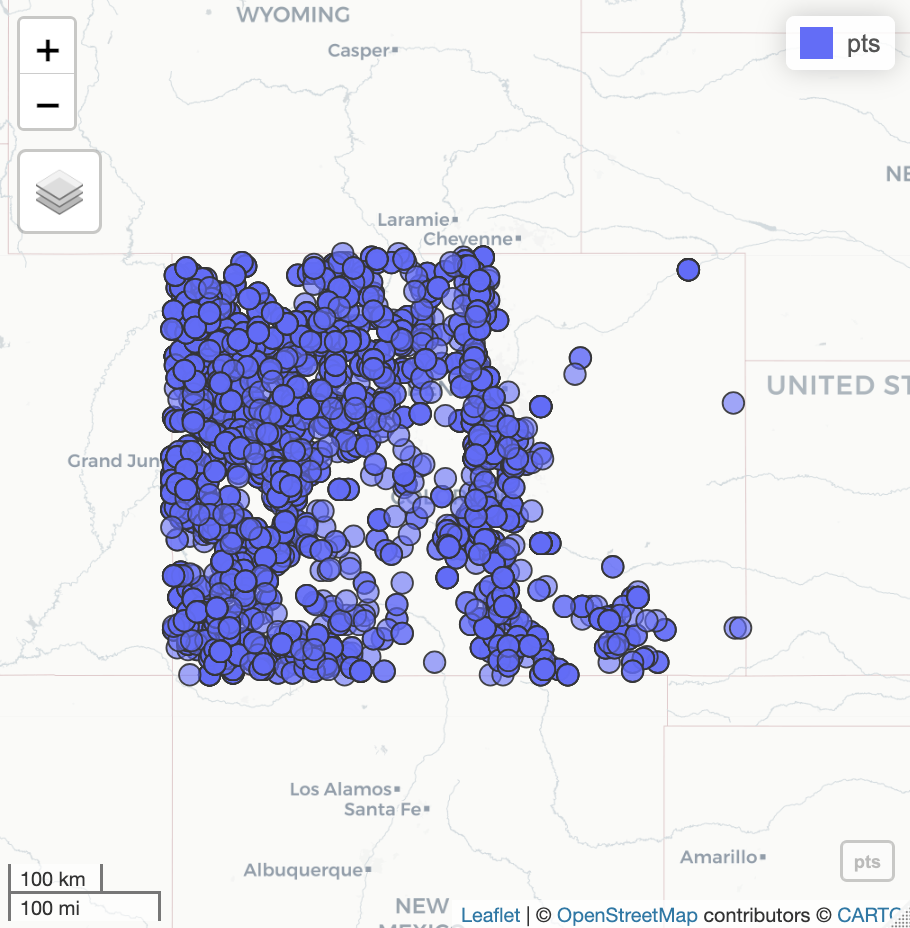

Next I had to limit the spatial data to Colorado :

Extract raster values at point locations and save them to a new column:

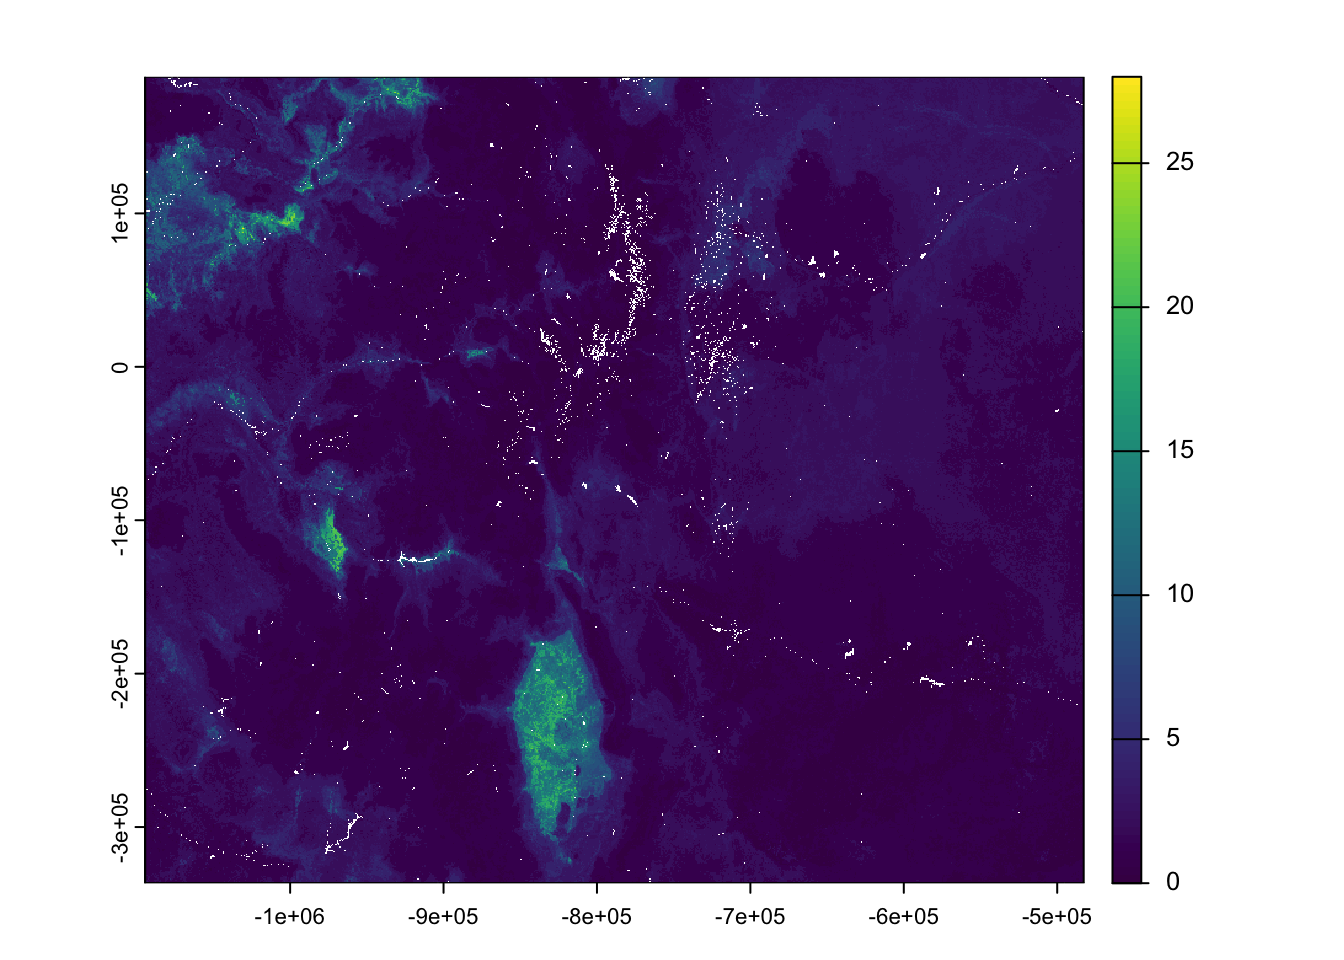

In [ ]:
pts$sl_forb_current = extract(r, pts)

That produced the above image which is the spatial data showing forb invasion risk in Colorado.

Then to get them to overlay each other, I did these steps :

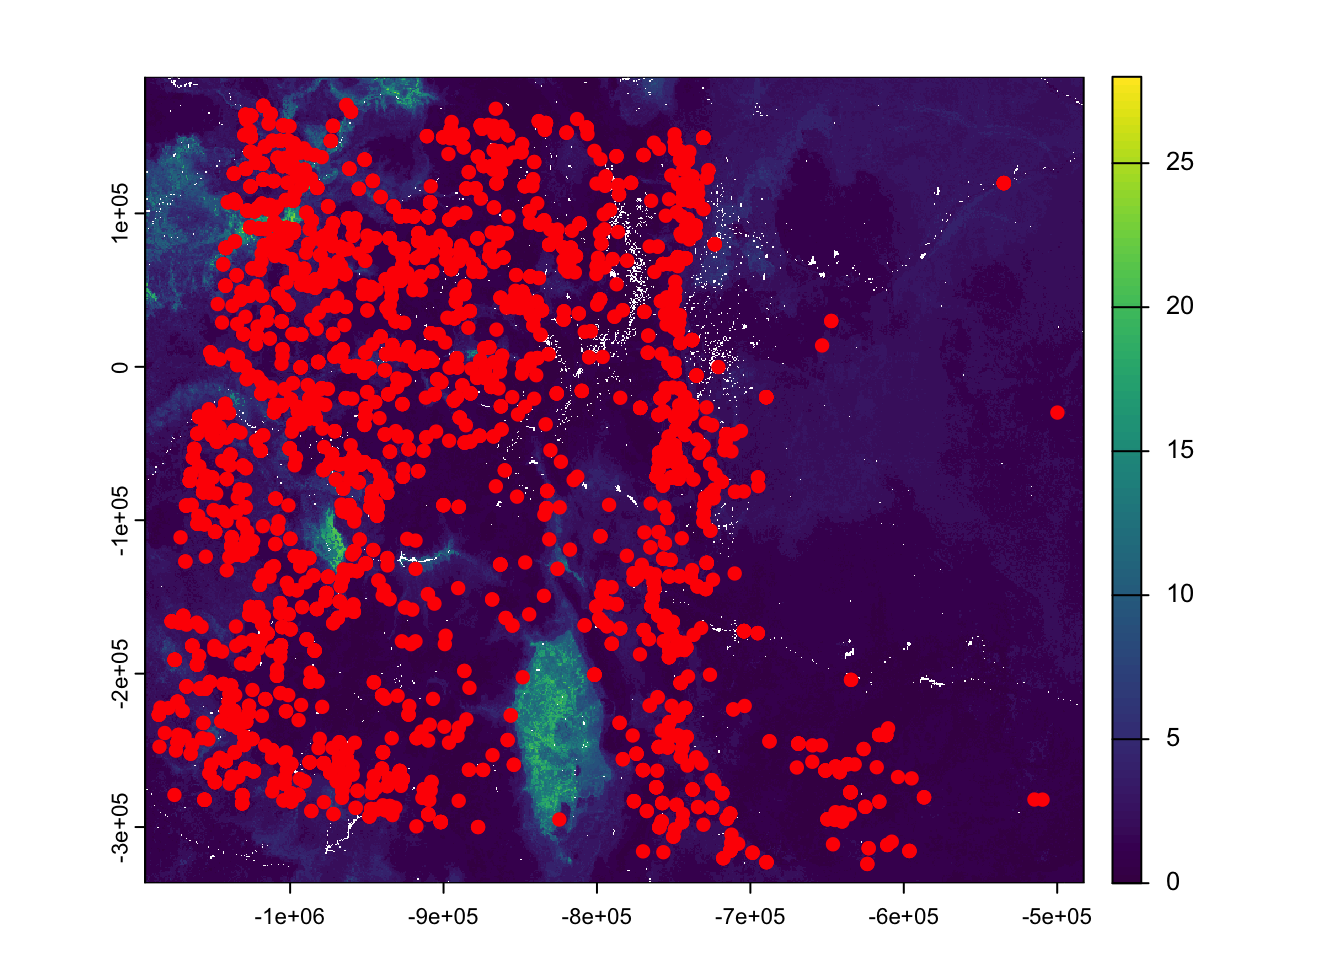

In [ ]:
# Add the (reprojected) points on top of the cropped raster in red
plot(cc)
plot(project(vect(pts), crs(r)), add = TRUE, col = "red", pch = 16)

I am still trying to learn how to work with spatial data and need some additional help with getting to a testing phase, but will be in office hours tomorrow.

<u>**Methods**</u>

The first test we will run will be to model the influence of a functional group of invasive species to see how that affects the projection for fire and an invasive return interval. We will try out several models including a linear regression, random forest, and Xgboost. We will also use a Bayesian model to get uncertainty estimates and a more flexible hierarchical structure to represent random effects for the region or species. We will find the best model and then we can use that to make projection predictions for sites that we don’t have projection data for.  

The second test we will run is an ANOVA test. With this test we will see if the mean invasion risk across our sights vary significantly. We could also potentially see if the risk of forbs or grasses are significantly different. We could also use this test to see if different burn severitys lead to different invasion risk. 

I believe that we have all the data we need for this project between our two datasets. One piece of supplemental data that might be useful  is data showing forest fires in Colorado. This would allow us to explore urn severity and its correlation to invasion risk. I think GIS or another form of spatial data would be ideal for this, but we are not sure if we will be able to do this on top of the other goals we have outlined.

A potential challenge is that our historic data counts invasive species, while the projection data projects invasion risk. Therefore we are going to have to figure out a way to make the two different types of data comparable. I think that a visualization of invasive cover could be useful and might help to bridge that gap. 

Along with handling spatial data, we also grapple with how we carry out our approaches. In addition to ANOVA, linear regression, random forest, and XGBoost models will be used to assess associations between fire severity, vegetation cover, and invasion threat. These models will inform us of linear and non-linear relationships and allow us to assess predictive performance. Spatial autocorrelation is also an issue as it could affect results if areas close to one another are too alike each other. Finally, as invasion and fire are persistent processes, it could be difficult to see evident patterns with predominantly new data, and therefore model calibration and validation would be an important part of our methodology.

The methods including ANOVA and learning models like random forest and XGBoost, will enable us to identify the most important predictors of invasive species spread and their effects on fire return intervals. Using a suite of methods, we will assess the extent to which different factors—like fire severity and region—drive invasion risk and enable us to predict future invasive species patterns across Colorado. We hope to apply these methods to improve our knowledge of how invasive species are altering fire return intervals and ecosystem health, guiding management and restoration.

Escobedo, V. M., Acuña-Rodrı́guez, I. S., Garcı́a, L. Y., Torres-Dı́az, C., Atala, C., Suazo, M. J., … Molina-Montenegro, M. A. (2024). Native woody species depend on the soil microbiome to establish on burned soils, while non-native do not. *Journal of Applied Ecology*, *61*(12), 2971–2984.

Gallardo, B., Clavero, M., Sánchez, M. I., & Vilà, M. (2016). Global ecological impacts of invasive species in aquatic ecosystems. *Global Change Biology*, *22*(1), 151–163.

Prevéy, J. S., Jarnevich, C. S., Pearse, I. S., Munson, S. M., Stevens, J. T., Barrett, K. J., et al.others. (2024). Non-native plant invasion after fire in western USA varies by functional type and with climate. *Biological Invasions*, *26*(4), 1157–1179.